In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
# Checking if there is any null values
df.isna().sum()

# We have missing values here in this dataset, so we'll handle this.

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [4]:
# Remove columns id and outcome since we don't need id columns, and outcome has more missing values than the non null

df.drop(['Id', 'Outcome'], axis = 1, inplace = True)

# We will add missing values on categorical variables with the most frequent
print("number of NaN values for the column Job :", df['Job'].isnull().sum())
print("number of NaN values for the column Education :", df['Education'].isnull().sum())
print("number of NaN values for the column Communication :", df['Communication'].isnull().sum())

number of NaN values for the column Job : 19
number of NaN values for the column Education : 169
number of NaN values for the column Communication : 902


In [5]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
# Run check for missing values after handling missing value in categorical var with most frequent (modes)
df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [6]:
print("number of NaN values for the column Job :", df['Job'].isnull().sum())
print("number of NaN values for the column Education :", df['Education'].isnull().sum())
print("number of NaN values for the column Communication :", df['Communication'].isnull().sum())

# We don't have missing value

number of NaN values for the column Job : 0
number of NaN values for the column Education : 0
number of NaN values for the column Communication : 0


In [7]:
from sklearn.preprocessing import LabelEncoder

# '', 'CallEnd', '', '', '', 'CallStart', ''
# transform nameOrig and nameDest 0 : C (customer) ,  1 : M (merchant)
# transfrom Job to 0 : Admin, 1 : Blue Collar, 2 : Entrepreneur, 3 : Housemaid, 4 : Management, 5 : Retired, 
                #  6 : Self-Employment, 7 : Services, 8 : Student, 9 : Technician, 10 : Unemployment 
# Marital = 0 : Divorced, 1 : Married, 2 : Single
# Education = 0 : Primary, 1 : Secondary, 2 : Tertiary
# Communication = 0 : Cellular, 1 : Telephone


df['Job'] = LabelEncoder().fit_transform(df['Job'])
df['Marital'] = LabelEncoder().fit_transform(df['Marital'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Communication'] = LabelEncoder().fit_transform(df['Communication'])
pd.concat([df.head(), df.tail()])

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,32,4,2,2,0,1218,1,0,1,28,jan,2,-1,0,13:45:20,13:46:30,0
1,32,1,1,0,0,1156,1,0,0,26,may,5,-1,0,14:49:03,14:52:08,0
2,29,4,2,2,0,637,1,0,0,3,jun,1,119,1,16:30:24,16:36:04,1
3,25,8,2,0,0,373,1,0,0,11,may,2,-1,0,12:06:43,12:20:22,1
4,30,4,1,2,0,2694,0,0,0,3,jun,1,-1,0,14:35:44,14:38:56,0
3995,28,9,2,2,0,0,1,0,0,25,may,1,40,2,17:46:28,17:50:57,1
3996,49,0,0,1,0,124,1,1,0,29,jul,19,-1,0,14:49:16,14:51:21,0
3997,27,0,2,1,0,-400,0,1,0,8,jul,1,-1,0,12:19:03,12:23:53,0
3998,36,2,2,2,0,658,1,0,0,29,jan,1,227,3,11:27:35,11:29:14,0
3999,45,7,1,0,0,137,1,0,0,9,may,2,-1,0,13:31:48,13:36:22,0


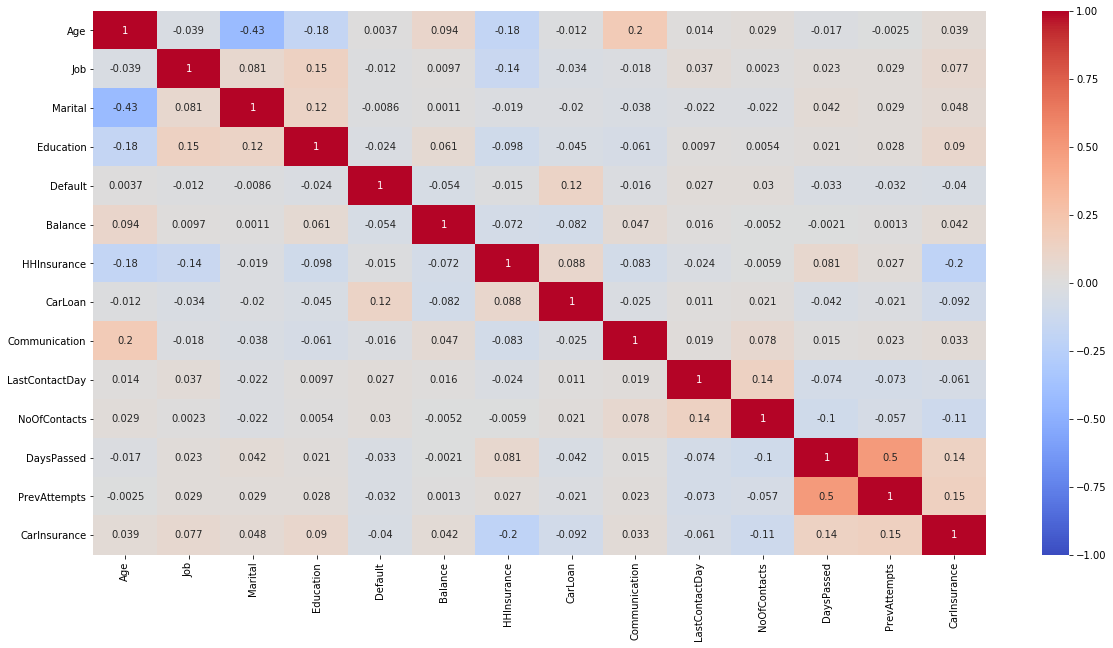

In [8]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [9]:
df.corr()['CarInsurance'].sort_values(ascending = True)

HHInsurance      -0.203419
NoOfContacts     -0.114884
CarLoan          -0.092131
LastContactDay   -0.061271
Default          -0.039506
Communication     0.032563
Age               0.039158
Balance           0.041561
Marital           0.047553
Job               0.076788
Education         0.090324
DaysPassed        0.138943
PrevAttempts      0.148763
CarInsurance      1.000000
Name: CarInsurance, dtype: float64

In [24]:
df['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

# Feature Selection

In [14]:
from sklearn.model_selection import train_test_split

X = df[['HHInsurance', 'NoOfContacts', 'CarLoan', 'Default', 'PrevAttempts', 'DaysPassed', 'Education', 'Job', 'Marital', 'Balance', 'Age', 'Communication']]
y = df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [15]:
X_train.shape

(3200, 12)

In [16]:
X_test.shape

(800, 12)

# Handling Imbalance Data

In [25]:
from sklearn.utils import resample

df_train = pd.concat([X_train, y_train], axis=1)
non_insurance = df_train[df_train['CarInsurance'] == 0] ## Kelas Majority
insurance = df_train[df_train['CarInsurance'] == 1] ## Kelas Minority

### SMOTE - Synthetic Minority Oversampling Technique

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [27]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [28]:
df_train['CarInsurance'].value_counts()

0    1917
1    1283
Name: CarInsurance, dtype: int64

In [29]:
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)
df_SMOTE['CarInsurance'].value_counts()

# to make sure, smote already done

1    1917
0    1917
Name: CarInsurance, dtype: int64

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

modelSMOTE_logreg =LogisticRegression()
modelSMOTE_logreg.fit(X_train_sm, y_train_sm)
y_pred_logreg = modelSMOTE_logreg.predict(X_test)
y_pred_logreg_train = modelSMOTE_logreg.predict(X_train_sm)

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [43]:
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1score_logreg = f1_score(y_test, y_pred_logreg)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

recall_logreg_train = recall_score(y_train_sm, y_pred_logreg_train)

print(f"train recall: {recall_logreg_train}")
print(f"test recall: {recall_logreg}")

train recall: 0.6828377673448096
test recall: 0.6230529595015576


In [44]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.72      0.64      0.67       479
           1       0.53      0.62      0.58       321

    accuracy                           0.63       800
   macro avg       0.63      0.63      0.62       800
weighted avg       0.64      0.63      0.63       800



In [45]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels = [1,0])
df_logreg = pd.DataFrame(data = cm_logreg, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg

,Prediksi 1,Prediksi 0
aktual 1,200,121
aktual 0,174,305


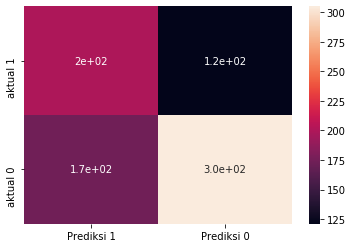

In [46]:
sns.heatmap(df_logreg, annot = True)

# KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train_sm, y_train_sm)
y_pred_KNN = modelKNN.predict(X_test)
y_pred_KNN_train = modelKNN.predict(X_train_sm)

In [50]:
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1score_KNN = f1_score(y_test, y_pred_KNN)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

recall_KNN_train = recall_score(y_train_sm, y_pred_KNN_train)

print(f"Train Recall KNN : {recall_KNN_train}")
print(f"Test Recall KNN : {recall_KNN}")

Train Recall KNN : 0.7949921752738655
Test Recall KNN : 0.5327102803738317


In [51]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       479
           1       0.45      0.53      0.49       321

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.54       800
weighted avg       0.56      0.55      0.55       800



In [52]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels = [1,0])
df_KNN = pd.DataFrame(data = cm_KNN, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN

,Prediksi 1,Prediksi 0
aktual 1,171,150
aktual 0,210,269


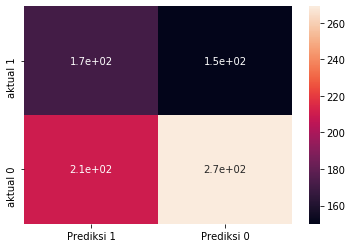

In [53]:
sns.heatmap(df_KNN, annot = True)

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
ModelDT =DecisionTreeClassifier()
ModelDT.fit(X_train_sm, y_train_sm)
y_pred_DT = ModelDT.predict(X_test)
y_pred_DT_train = ModelDT.predict(X_train_sm)

In [56]:
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1score_DT = f1_score(y_test, y_pred_DT)
acc_DT = accuracy_score(y_test, y_pred_DT)

recall_DT_train = recall_score(y_train_sm, y_pred_DT_train)

print(f"Train Recall KNN : {recall_DT_train}")
print(f"Test Recall KNN : {recall_DT}")

Train Recall KNN : 1.0
Test Recall KNN : 0.4953271028037383


In [57]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       479
           1       0.47      0.50      0.48       321

    accuracy                           0.58       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.58      0.58      0.58       800



In [58]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,159,162
Aktual 0,176,303


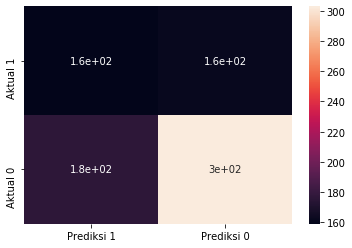

In [59]:
sns.heatmap(df_DT, annot =True )

In [60]:
eval_met = {
    "LogisticReg": [precision_logreg, recall_logreg, f1score_logreg, acc_logreg],
    "KNN": [precision_KNN, recall_KNN, f1score_KNN, acc_KNN],
    "DecisionTree": [precision_KNN, recall_KNN, f1score_KNN, acc_KNN] 
}


pd.DataFrame(data = eval_met, index = ['Precision', 'Recall', 'F1-Score', 'Accuracy'])


# we can see that the difference between three base model
# Logistic Regression has the highest Recall score than KNN and Decision Tree

,LogisticReg,KNN,DecisionTree
Precision,0.534759,0.448819,0.448819
Recall,0.623053,0.532710,0.532710
F1-Score,0.575540,0.487179,0.487179
Accuracy,0.631250,0.550000,0.550000


# Scalling

In [61]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [65]:
## Scaling using StandardScaler 

s_scale = StandardScaler()
X_train_scaled = s_scale.fit_transform(X_train_sm)
X_test_scaled = s_scale.fit_transform(X_test)

# LogReg Scaling

In [66]:
logreg_scaled =LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train_sm)
y_pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)
y_pred_logreg_scaled_train = logreg_scaled.predict(X_train_scaled)

In [69]:
precision_logreg_scaled = precision_score(y_test, y_pred_logreg_scaled)
recall_logreg_scaled = recall_score(y_test, y_pred_logreg_scaled)
f1score_logreg_scaled = f1_score(y_test, y_pred_logreg_scaled)
acc_logreg_scaled = accuracy_score(y_test, y_pred_logreg_scaled)

recall_logreg_scaled_train = recall_score(y_train_sm, y_pred_logreg_scaled_train)

print(f"Train Recall LogReg Scaled : {recall_logreg_scaled_train}")
print(f"Test Recall LogReg Scaled : {recall_logreg_scaled}")

Train Recall LogReg Scaled : 0.6911841418883672
Test Recall LogReg Scaled : 0.67601246105919


In [70]:
print(classification_report(y_test, y_pred_logreg_scaled))

              precision    recall  f1-score   support

           0       0.74      0.61      0.66       479
           1       0.53      0.68      0.60       321

    accuracy                           0.63       800
   macro avg       0.64      0.64      0.63       800
weighted avg       0.66      0.63      0.64       800



In [71]:
cm_logreg_scaled = confusion_matrix(y_test, y_pred_logreg_scaled, labels = [1,0])
df_logreg_scaled = pd.DataFrame(data = cm_logreg_scaled, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_scaled

# After scalling, Recall CarInsurance 1 get a better score

,Prediksi 1,Prediksi 0
Aktual 1,217,104
Aktual 0,189,290


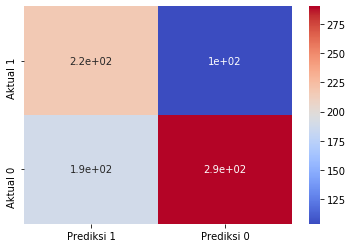

In [74]:
sns.heatmap(df_logreg_scaled, annot = True, cmap= 'coolwarm')

# KNN Scalled

In [75]:
modelKNN_scaled = KNeighborsClassifier()
modelKNN_scaled.fit(X_train_scaled, y_train_sm)
y_pred_KNN_scaled = modelKNN_scaled.predict(X_test_scaled)
y_pred_KNN_scaled_train = modelKNN_scaled.predict(X_train_scaled)

In [76]:
precision_KNN_scaled = precision_score(y_test, y_pred_KNN_scaled)
recall_KNN_scaled = recall_score(y_test, y_pred_KNN_scaled)
f1score_KNN_scaled = f1_score(y_test, y_pred_KNN_scaled)
acc_KNN_scaled = accuracy_score(y_test, y_pred_KNN_scaled)

recall_KNN_scaled_train = recall_score(y_train_sm, y_pred_KNN_scaled_train)

print(f"Train Recall KNN Scaled : {recall_KNN_scaled_train}")
print(f"Test Recall KNN Scaled : {recall_KNN_scaled}")

Train Recall KNN Scaled : 0.7610850286906625
Test Recall KNN Scaled : 0.5327102803738317


In [77]:
print(classification_report(y_test, y_pred_KNN_scaled))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       479
           1       0.50      0.53      0.52       321

    accuracy                           0.60       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.61      0.60      0.60       800



In [78]:
cm_KNN_scaled = confusion_matrix(y_test, y_pred_KNN_scaled, labels = [1,0])
df_KNN_scaled = pd.DataFrame(data = cm_KNN_scaled, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_scaled

# After scalling, Recall CarInsurance 1 get the same score as KNN base model

,Prediksi 1,Prediksi 0
Aktual 1,171,150
Aktual 0,169,310


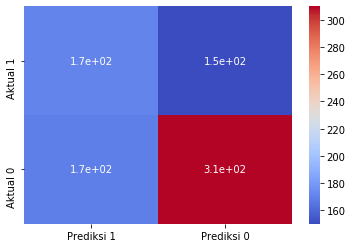

In [79]:
sns.heatmap(df_KNN_scaled, annot = True, cmap= 'coolwarm')

# Decision Tree Scalling

In [81]:
ModelDT_scaled = DecisionTreeClassifier()
ModelDT_scaled.fit(X_train_scaled, y_train_sm)
y_pred_DT_scaled = ModelDT_scaled.predict(X_test_scaled)
y_pred_DT_scaled_train = ModelDT_scaled.predict(X_train_scaled)

In [82]:
precision_DT_scaled = precision_score(y_test, y_pred_DT_scaled)
recall_DT_scaled = recall_score(y_test, y_pred_DT_scaled)
f1score_DT_scaled = f1_score(y_test, y_pred_DT_scaled)
acc_DT_scaled = accuracy_score(y_test, y_pred_DT_scaled)

recall_DT_scaled_train = recall_score(y_train_sm, y_pred_DT_scaled_train)

print(f"Train Recall Decision Tree Scaled : {recall_DT_scaled_train}")
print(f"Test Recall Decision Tree Scaled : {recall_DT_scaled}")

Train Recall Decision Tree Scaled : 1.0
Test Recall Decision Tree Scaled : 0.45482866043613707


In [83]:
print(classification_report(y_test, y_pred_DT_scaled))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       479
           1       0.47      0.45      0.46       321

    accuracy                           0.58       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.57      0.58      0.58       800



In [84]:
cm_DT_scaled = confusion_matrix(y_test, y_pred_DT_scaled, labels = [1,0])
df_DT_scaled = pd.DataFrame(data = cm_DT_scaled, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_scaled

# After scalling, Recall CarInsurance 1 get more worse score as Decision Tree base model

,Prediksi 1,Prediksi 0
Aktual 1,146,175
Aktual 0,163,316


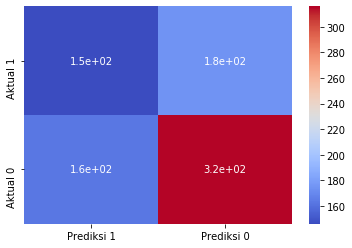

In [85]:
sns.heatmap(df_DT_scaled, annot = True, cmap= 'coolwarm')

In [98]:
eval_met_scaled = {
    "LogisticReg Scaled ": [precision_logreg_scaled, recall_logreg_scaled, f1score_logreg_scaled, acc_logreg_scaled],
    "KNN Scaled ": [precision_KNN_scaled, recall_KNN_scaled, f1score_KNN_scaled, acc_KNN_scaled],
    "DecisionTree Scaled": [precision_DT_scaled, recall_DT_scaled, f1score_DT_scaled, acc_DT_scaled] 
}


pd.DataFrame(data = eval_met_scaled, index = ['Precision', 'Recall', 'F1-Score', 'Accuracy'])


# we can see that the difference between three scaled model
# Logistic Regression has the highest Recall score than KNN and Decision Tree after scaling with Standard Scaler

,LogisticReg Scaled,KNN Scaled,DecisionTree Scaled
Precision,0.534483,0.502941,0.472492
Recall,0.676012,0.532710,0.454829
F1-Score,0.596974,0.517398,0.463492
Accuracy,0.633750,0.601250,0.577500


# Hyperparameter Tuning


#### Logistic Regression

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
logreg_tuned = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuned, param_grid = param_logreg, 
                                  cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   15.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [89]:
logreg_tuned_ = model_logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_tuned_.predict(X_test)
y_pred_logreg_train_tuned = logreg_tuned_.predict(X_train_sm)

precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
f1score_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)

recall_logreg_train_tuned = recall_score(y_train_sm, y_pred_logreg_train_tuned)

print(f"Train Recall LogReg Tuned : {recall_logreg_train_tuned}")
print(f"Test Recall LogReg Tuned : {recall_logreg_tuned}")

# The score get worse for logistic regression after hyperparameter tuning

Train Recall LogReg Tuned : 0.6421491914449661
Test Recall LogReg Tuned : 0.6012461059190031


In [90]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       479
           1       0.53      0.60      0.57       321

    accuracy                           0.63       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.64      0.63      0.63       800



In [91]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
print(df_logreg_tuned)
print(df_logreg)


          Prediksi 1  Prediksi 0
Aktual 1         193         128
Aktual 0         169         310
          Prediksi 1  Prediksi 0
aktual 1         200         121
aktual 0         174         305


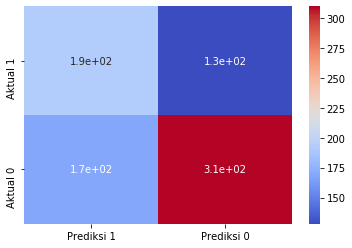

In [93]:
sns.heatmap(df_logreg_tuned, annot =True, cmap= 'coolwarm')

# KNN Tuning

In [100]:
KNN_tuned = KNeighborsClassifier()
param_KNN = {'n_neighbors': [5, 3 , 10, 20],
            'weights': ['uniform', 'distance'],
            'p': [2,1, 0.2],
            'algorithm': ['auto', 'kd_tree']}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuned, param_grid = param_KNN, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_KNN_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    8.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [5, 3, 10, 20], 'p': [2, 1, 0.2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [101]:
KNN_tuned_ = model_KNN_tuned.best_estimator_
y_pred_KNN_tuned = model_KNN_tuned.predict(X_test)
y_pred_KNN_train_tuned = model_KNN_tuned.predict(X_train_sm)

precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
f1score_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)

recall_KNN_train_tuned = recall_score(y_train_sm, y_pred_KNN_train_tuned)

print(f"Train Recall KNN Tuned : {recall_KNN_train_tuned}")
print(f"Test Recall KNN Tuned : {recall_KNN_tuned}")

Train Recall KNN Tuned : 1.0
Test Recall KNN Tuned : 0.5233644859813084


In [102]:
# KNN Tuned
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       479
           1       0.46      0.52      0.49       321

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.57      0.56      0.57       800



In [105]:
# KNN Base Model

print(classification_report(y_test, y_pred_KNN_scaled))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       479
           1       0.50      0.53      0.52       321

    accuracy                           0.60       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.61      0.60      0.60       800



In [103]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
print(df_KNN_tuned)
print(df_logreg)


          Prediksi 1  Prediksi 0
Aktual 1         193         128
Aktual 0         169         310
          Prediksi 1  Prediksi 0
aktual 1         200         121
aktual 0         174         305


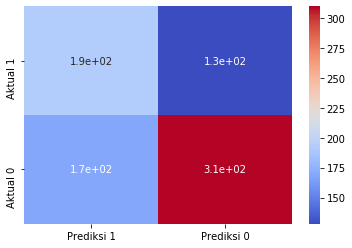

In [104]:
sns.heatmap(df_KNN_tuned, annot =True, cmap= 'coolwarm')

In [97]:
# Base Model

pd.DataFrame(data = eval_met, index = ['Precision', 'Recall', 'F1-Score', 'Accuracy'])

,LogisticReg,KNN,DecisionTree
Precision,0.534759,0.448819,0.448819
Recall,0.623053,0.532710,0.532710
F1-Score,0.575540,0.487179,0.487179
Accuracy,0.631250,0.550000,0.550000


In [99]:
# Scaled

pd.DataFrame(data = eval_met_scaled, index = ['Precision', 'Recall', 'F1-Score', 'Accuracy'])

# 

,LogisticReg Scaled,KNN Scaled,DecisionTree Scaled
Precision,0.534483,0.502941,0.472492
Recall,0.676012,0.532710,0.454829
F1-Score,0.596974,0.517398,0.463492
Accuracy,0.633750,0.601250,0.577500


### There's an upgrade recall score between base model LogReg and LogReg Scalled
### From 62% to 67.6%

### Conclusion

#### Logistic Regression has the best recall score among all algorithm that we tried in this notebook
    - from all the algorithm we tried (Logistic Regression, KNN, and Decision Tree) Logistic regression has the best recall score (62.3%)
    

#### Scalling has an effect on Logistic Regression